In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve, validation_curve, cross_val_score

In [3]:
url = 'https://raw.githubusercontent.com/digipodium/Datasets/main/regression/dataA.csv'
df = pd.read_csv(url)
df

,x,y,z
0,81.997014,99.017636,a
1,41.724756,73.680872,a
2,26.566336,70.189922,a
3,124.561476,12.295715,a
4,142.729102,46.652237,a
...,...,...,...
178,450.746577,322.478336,a
179,411.621174,322.344057,a
180,421.518437,334.330992,a
181,432.723531,296.987125,a


In [6]:
X = df[['x']]
y = df['y']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

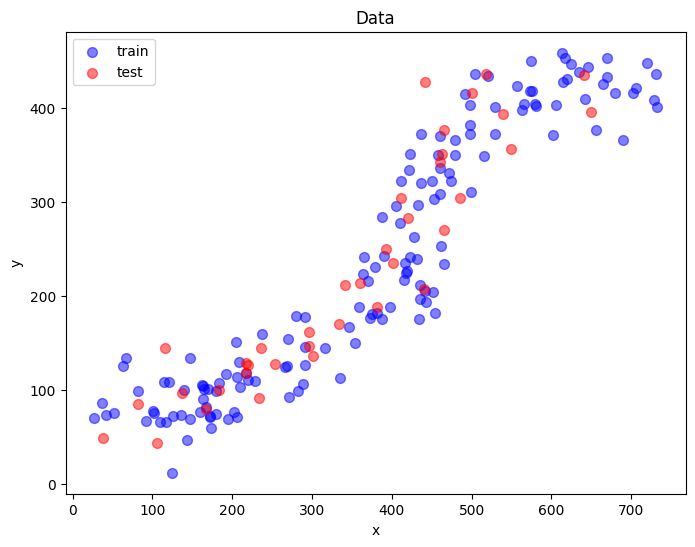

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(Xtrain, ytrain, label='train', color='blue', alpha=.5, s=50)
ax.scatter(Xtest, ytest, label='test', color='red', alpha=.5, s=50)
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Data')
plt.show()

# validation curve

In [43]:
# polynomial linear regression - validation curve
train_scores, test_scores = validation_curve(
    Pipeline([('poly', PolynomialFeatures()), ('linear', LinearRegression())]),
    Xtrain,
    ytrain, 
    param_name='poly__degree', 
    param_range=range(1,20), 
    cv=5)

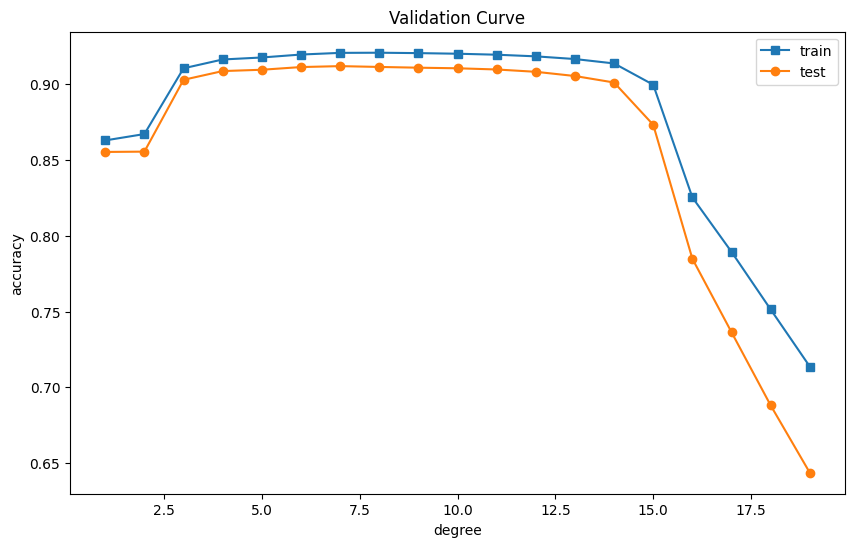

In [44]:
# visualize validation curve
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(range(1, 20), np.mean(train_scores, axis=1), label='train', marker='s')
ax.plot(range(1, 20), np.mean(test_scores, axis=1), label='test', marker='o')
ax.set_xlabel('degree')
ax.set_ylabel('accuracy')
ax.set_title('Validation Curve')
ax.legend()
plt.show()

# learning curve

In [54]:
train_sizes, train_scores, test_scores = learning_curve(
    Pipeline([('poly', PolynomialFeatures(degree=7)), ('linear', LinearRegression())]),
    X,
    y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5)

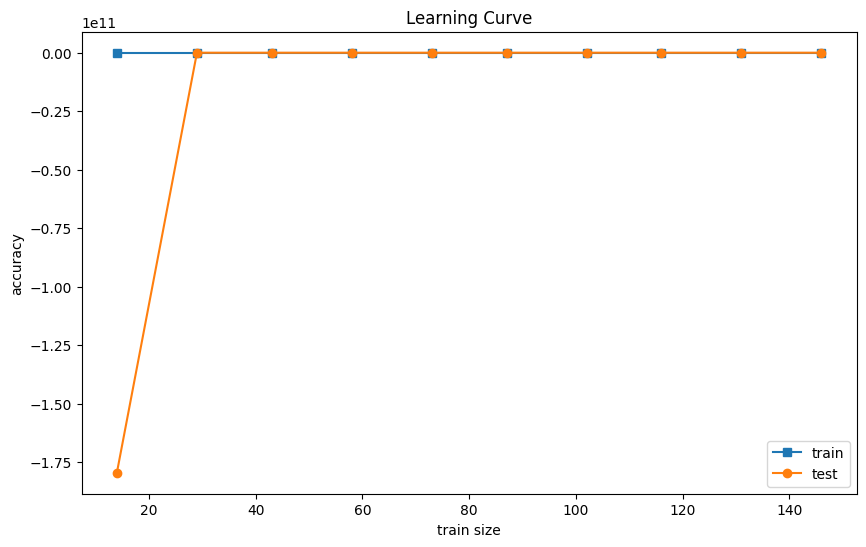

In [55]:
# visualize learning curve
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(train_sizes, np.mean(train_scores, axis=1), label='train', marker='s')
ax.plot(train_sizes, np.mean(test_scores, axis=1), label='test', marker='o')
ax.set_xlabel('train size')
ax.set_ylabel('accuracy')
ax.set_title('Learning Curve')
ax.legend()
plt.show()